<a href="https://colab.research.google.com/github/irfanrfn/House-Prices-Analysis/blob/main/House_Prices_Irfan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real Estate Valuation - Taiwan

The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. 

## Goal of this notebook: 
The goal of this notebook is to predict the house price of unit area in Tawain (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared).

## Source of dataset 
UCI Machine Learning Repository [click here.](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set)

## Attribute Information:
The inputs are as follows:

- X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.) 
- X2=the house age (unit: year) 
- X3=the distance to the nearest MRT station (unit: meter) 
- X4=the number of convenience stores in the living circle on foot (integer) 
- X5=the geographic coordinate, latitude. (unit: degree) 
- X6=the geographic coordinate, longitude. (unit: degree) 

The output is as follow:
- Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared) 


[Download dataset](https://drive.google.com/file/d/1uUOmUjoOgrJAooZUUzr4kR6zqiV0cmHw/view?usp=sharing()

# 1. Import Dataset



In [1]:
#import package
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/irfanrfn/House-Prices-Analysis/main/real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
# Checking numbers of row and column
df.shape

(414, 8)

Dataset real estate valuation mempunyai 414 baris dan 8 kolom/atribut dimana 1 atribut menunjukkan number kolomnya diluar kolom no

In [4]:
#drop column no
df.drop('No', inplace=True, axis=1)

In [5]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### Profiling Descriptive Stats

In [6]:
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Harga rumah ini menyebar dari range 7.6 Ping sampai 117.5 Ping dengan rata-rata harga rumahnya 37.9 Ping. Data sebaran harga rumah hampir menyebar normal jika dilihat dari nilai mean dan median (50%/Q2) yang hampir sama.

#### Simplify the colums label for a better processing

In [7]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [8]:
#Hapus comment pada label column supaya lebih simple
df.rename(columns={'X1 transaction date' : 'X1', 'X2 house age':'X2',
       'X3 distance to the nearest MRT station':'X3',
       'X4 number of convenience stores':'X4', 'X5 latitude':'X5', 'X6 longitude':'X6',
       'Y house price of unit area':'Y'}, inplace=True)

In [9]:
df

,X1,X2,X3,X4,X5,X6,Y
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


# 2. EDA

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df.describe

<bound method NDFrame.describe of            X1    X2          X3  X4        X5         X6     Y
0    2012.917  32.0    84.87882  10  24.98298  121.54024  37.9
1    2012.917  19.5   306.59470   9  24.98034  121.53951  42.2
2    2013.583  13.3   561.98450   5  24.98746  121.54391  47.3
3    2013.500  13.3   561.98450   5  24.98746  121.54391  54.8
4    2012.833   5.0   390.56840   5  24.97937  121.54245  43.1
..        ...   ...         ...  ..       ...        ...   ...
409  2013.000  13.7  4082.01500   0  24.94155  121.50381  15.4
410  2012.667   5.6    90.45606   9  24.97433  121.54310  50.0
411  2013.250  18.8   390.96960   7  24.97923  121.53986  40.6
412  2013.000   8.1   104.81010   5  24.96674  121.54067  52.5
413  2013.500   6.5    90.45606   9  24.97433  121.54310  63.9

[414 rows x 7 columns]>

Key takeaway: Harga rumah ini menyebar dari range 7.6 Ping sampai 117.5 Ping dengan rata-rata harga rumahnya 37.9 Ping. Data sebaran harga rumah hampir menyebar normal jika dilihat dari nilai mean dan median (50%/Q2) yang hampir sama.

**Sebaran harga rumah**

In [12]:
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats

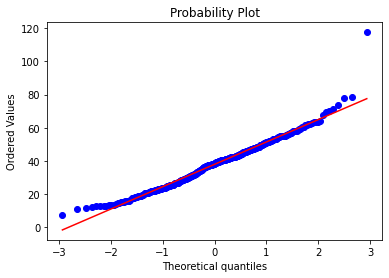

In [13]:
#QQ-Plot
stats.probplot(df['Y'], dist='norm', plot=py)
py.show()

Key takeaway: Berdasarkan QQ-plot dapat diketahui bahwa titik-titik data menempel/mendekati garis diagonal. Hal ini menunjukkan bahwa data harga unit rumah menyebar normal. Maka model harga unit rumah bisa di prediksi menggunakan model regresi karena memenuhi salah satu asumsi regresi yaitu asumsi normalitas.

**Mencari Outlier**


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


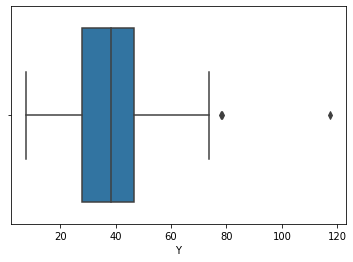

In [14]:
sns.boxplot(df['Y'])


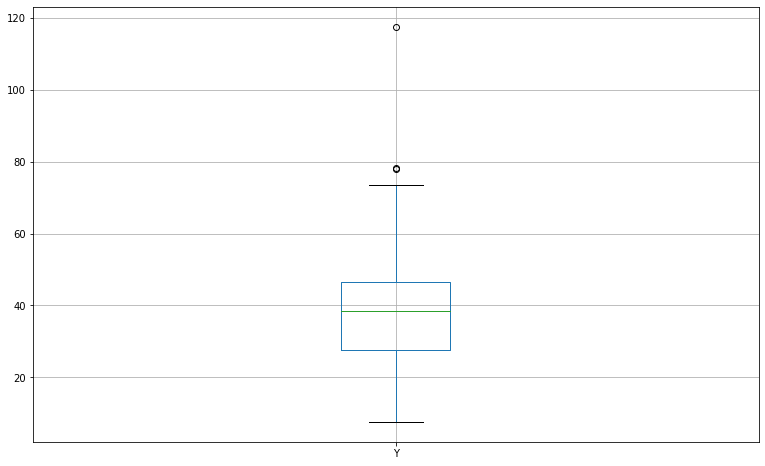

In [15]:
df[['Y']].boxplot(figsize=(13,8))

Key takeaway: Ada outliers yaitu data disekitar nilai 75-80 dan data dibawah 120. 

In [16]:
#Find Q1 & Q3
q1 = np.percentile(df.Y, 25)
q3 = np.percentile(df.Y, 75)

In [17]:
q1

27.7

In [18]:
# Find the IQR which is the difference between third and first quartile
iqr = q3-q1


In [19]:
# Find lower and upper bound
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)

In [20]:
# Find outliers
df[(df['Y'] < lower_bound) | (df['Y'] > upper_bound)]

,X1,X2,X3,X4,X5,X6,Y
220,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
270,2013.333,10.8,252.5822,1,24.97460,121.53046,117.5
312,2013.583,35.4,318.5292,9,24.97071,121.54069,78.0


Key takeaway: Nilai outliernya adalah nilai yang lebih dari upper bound (78, 78.3 dan 117.5)

Variabel apa saja yang berkorelasi dengan harga rumah? Bagaimana arah dan seberapa
erat hubungannya?

**Note : Jika koef korelasi >= 0.5, ada hubungan antar variabel**

**Jika koef korelasi < 0.5, tidak ada hubungan antar variabel**

In [21]:
df.corr()

,X1,X2,X3,X4,X5,X6,Y
X1,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<ipython-input-22-ae58fd54d8c4>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

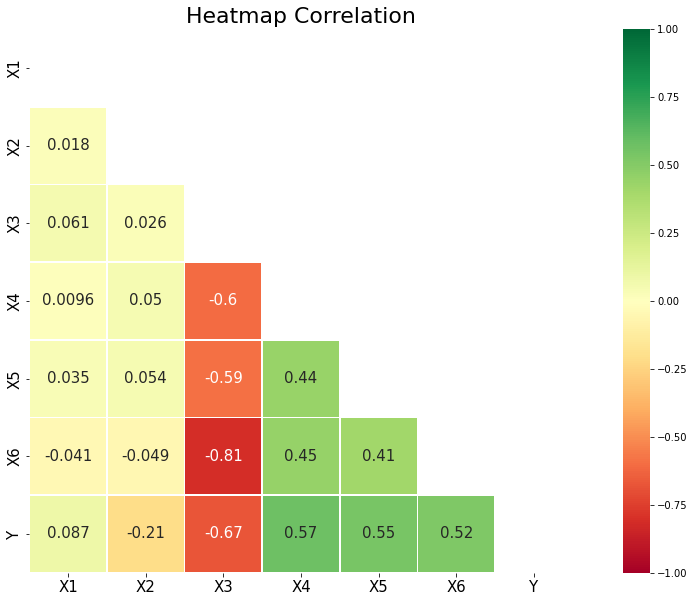

In [22]:
#Heatmap Correlation
import seaborn as sns
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,cmap="RdYlGn", vmin=-1, vmax=1, center=0, cbar=True, annot =True,
            square=True, linewidths=.5, annot_kws={"size": 15})
plt.xticks(rotation=0, fontsize=15)
plt.title('Heatmap Correlation', fontsize=22)
plt.yticks(fontsize=15)

Key takeaway: Berdasarkan correlation test dapat diketahui bahwa ada hubungan variable antara variable X3,X4,x5,X6 dengan Y.

* X3 dan Y memiliki koef corr (-0.67) artinya jarak MRT berhubungan negatif dengan besarnya harga unit rumah. Semakin dekat areal perumahan dengan MRT semakin mahal harga rumahnya, dan sebaliknya.


### X2 vs Y

In [23]:
import matplotlib.pyplot as plt

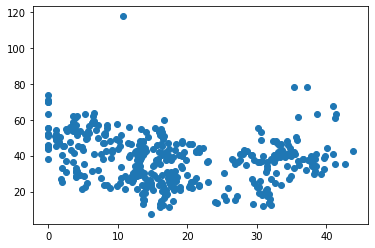

In [24]:
#House Age vs House Price Plot
plt.scatter(df['X2'],df['Y'])

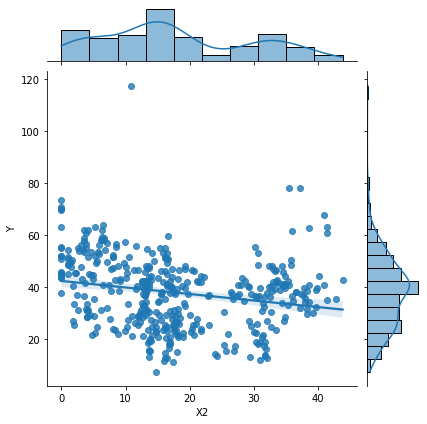

In [25]:
import seaborn as sns
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X2', y='Y', data=df, kind="reg")

Key takeaway: Usia rumah (X2) tidak memiliki hubungan yang signifikan dengan harga rumah (Y).

### X3 vs Y

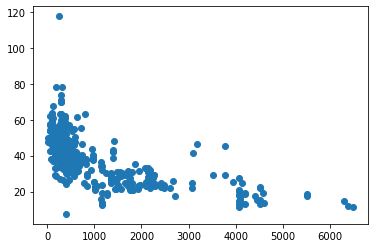

In [26]:
#distance to the nearest MRT station vs House Price Plot
plt.scatter(df['X3'],df['Y'])

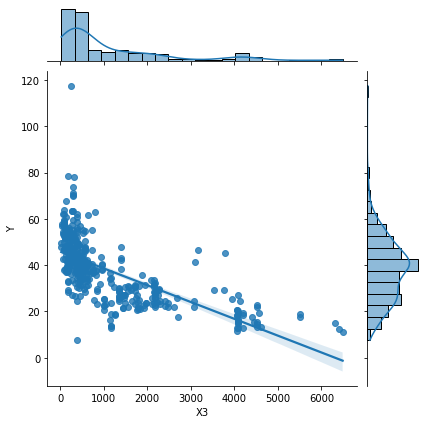

In [27]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X3', y='Y', data=df, kind="reg")

Key takeaway: Ada hubungan negatif antara jarak MRT disekitar areal perumahan dengan harga unit rumah. Semakin dekat jarak MRT semakin mahal harga unit rumahnya, semakin jauh jarak MRT semakin murah harga unit rumahnya.

### X4 vs Y

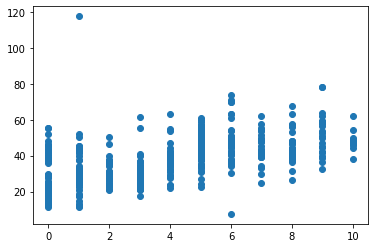

In [28]:
#number of convenience stores vs House Price
plt.scatter(df['X4'],df['Y'])

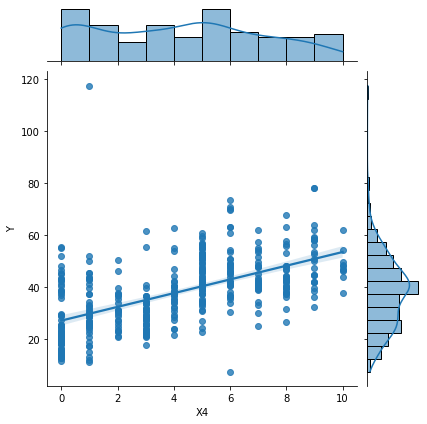

In [29]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X4', y='Y', data=df, kind="reg")

Key takeaway: ada hubungan positif antara banyaknya pusat perbelanjaan/minimarket di sekitar areal perumahan dengan harga unit rumahnya. Artinya semakin banyak pusat perbelanjaan semakin mahal harga unit rumahnya dan sebaliknya.

### X5 vs Y

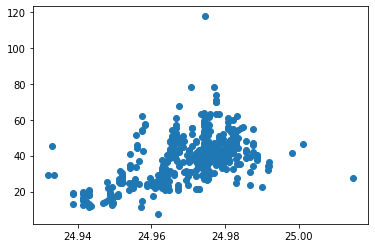

In [30]:
#Latitude vs House Price
plt.scatter(df['X5'],df['Y'])

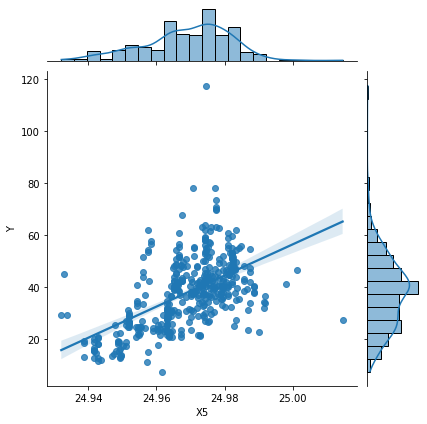

In [31]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X5', y='Y', data=df, kind="reg")

Key takeaway: Ada hubungan positif antara garis lintang (posisi letak geografis rumah) dengan harga unit rumahnya.

### X6 vs Y

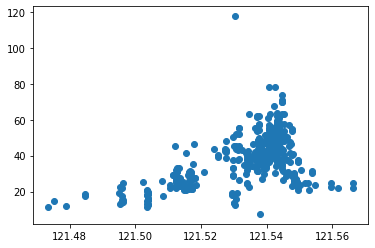

In [32]:
#Longitude vs House Price
plt.scatter(df['X6'], df['Y'])

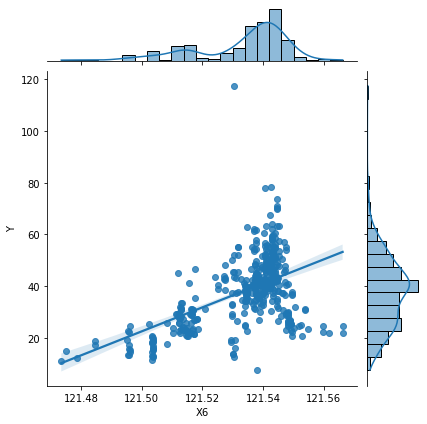

In [33]:
#create scatterplot with regression line & dist and confidence interval lines
sns.jointplot(x='X6', y='Y', data=df, kind="reg")

Key takeaway: Ada hubungan positif antara garis bujur (letak geografis) rumah dengan harga unit rumahnya.

Dapat disimpulkan bahwa variable yang berhubungan dengan harga unit rumah (Y):

1. X3
2. X4
3. X5
4. X6





## Feature Engineering:

###  Checking Multicolinearity

In [34]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation Matrix antara variable X')

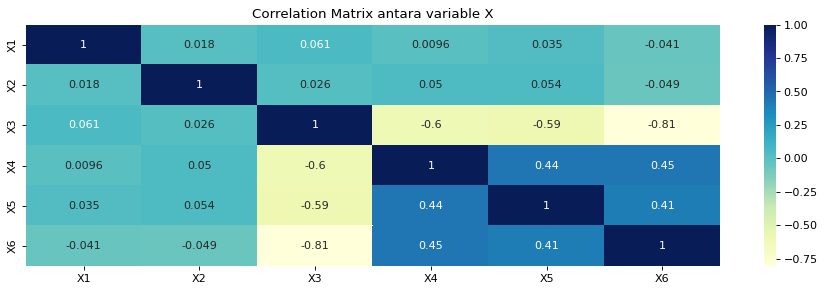

In [35]:
fig, ax = plt.subplots(figsize=(14,4), dpi=80)
sns.heatmap(df.loc[:, 'X1':'X6'].corr(), cmap="YlGnBu",annot=True)
plt.title('Correlation Matrix antara variable X')

Key takeaway: Ada multicolinearity (hubungan yg kuat antar X atau selain Y) hubungan yang kuat antar variable X adalah X3 dan X6. X3 dan X6 memiliki korelasi yang signifikan (-0.81).


**Decision**


Karena ada multicolinearity harus di pilih mana yang harus di take out dari model antara X3 dan X6 bisa pilih nilai yang correlation nya lebih rendah dengan Y. X3= (-0.67) X6= (0.52) jadi yang bisa di takeout adalah X6.

# 3. Data Preprocessing

### Check null values

In [36]:
df.isna().sum().sort_values(ascending=False)

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64

Key takeaway: Tidak ada null values

### Data Conversion

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      414 non-null    float64
 1   X2      414 non-null    float64
 2   X3      414 non-null    float64
 3   X4      414 non-null    int64  
 4   X5      414 non-null    float64
 5   X6      414 non-null    float64
 6   Y       414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


Key takeaway: ada kesalahan tipe data, X1 harusnya tipe datetime walaupun x1 tidak dimasukkan ke model.

In [38]:
df["X1"] = pd.to_datetime(df["X1"])

In [39]:
df.dtypes

X1    datetime64[ns]
X2           float64
X3           float64
X4             int64
X5           float64
X6           float64
Y            float64
dtype: object

In [40]:
df.X1

0     1970-01-01 00:00:00.000002012
1     1970-01-01 00:00:00.000002012
2     1970-01-01 00:00:00.000002013
3     1970-01-01 00:00:00.000002013
4     1970-01-01 00:00:00.000002012
                   ...             
409   1970-01-01 00:00:00.000002013
410   1970-01-01 00:00:00.000002012
411   1970-01-01 00:00:00.000002013
412   1970-01-01 00:00:00.000002013
413   1970-01-01 00:00:00.000002013
Name: X1, Length: 414, dtype: datetime64[ns]

### Checking duplicate values

In [41]:
# Check duplicate values
df[df.duplicated(keep=False)]

,X1,X2,X3,X4,X5,X6,Y


Key takeaway: Tidak ada duplikat data

# 4. Model Prediction

In [42]:
X = df.loc[:, 'X3':'X5']

In [43]:
y = pd.DataFrame(df['Y'])

In [44]:
#membagai dataset menjadi data training dan data testing dengan proporsi 80:20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [45]:
X

,X3,X4,X5
0,84.87882,10,24.98298
1,306.59470,9,24.98034
2,561.98450,5,24.98746
3,561.98450,5,24.98746
4,390.56840,5,24.97937
...,...,...,...
409,4082.01500,0,24.94155
410,90.45606,9,24.97433
411,390.96960,7,24.97923
412,104.81010,5,24.96674


In [46]:
y

,Y
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


### Feature Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [48]:
np.set_printoptions(suppress=True) 
print(X_train[:10])

[[-0.19222706 -0.07030829  0.76166568]
 [-0.76884442  0.27192764 -0.21962418]
 [-0.78048349  1.64087134  0.39489645]
 [-0.53713543  0.27192764  0.80295758]
 [ 0.14884564 -1.09701606  0.60621382]
 [-0.76468035  1.98310727  1.00132063]
 [ 2.4435883  -1.43925199 -2.14415058]
 [ 0.90980693 -0.41254421 -0.51838322]
 [-0.61625119  0.61416356  0.64669607]
 [-0.75461243  1.29863542 -0.15323328]]


In [49]:
print(y_train[:10])

        Y
159  37.4
95   51.8
11   58.1
374  49.5
165  30.6
363  48.0
41   18.2
401  27.7
379  69.7
389  67.7


## Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
ypred=model.predict(X_test)

In [52]:
ypred

array([[33.05831803],
       [45.11022171],
       [24.28411801],
       [17.6627636 ],
       [41.37655983],
       [34.20550304],
       [33.02289696],
       [44.42301466],
       [41.19156516],
       [18.21185436],
       [18.84810108],
       [44.03282421],
       [34.33825591],
       [43.39901022],
       [50.57934641],
       [35.60164725],
       [41.37655983],
       [43.41739645],
       [33.0469522 ],
       [47.12094827],
       [53.52563532],
       [32.4695129 ],
       [46.95536592],
       [46.99485513],
       [45.07972923],
       [31.7073456 ],
       [33.05475734],
       [44.63415682],
       [46.13057908],
       [17.2956051 ],
       [33.57398175],
       [41.92371141],
       [42.59611606],
       [44.63415682],
       [49.68204084],
       [16.23777466],
       [44.67085997],
       [45.52007867],
       [37.91237171],
       [17.6627636 ],
       [47.28166698],
       [31.20518096],
       [50.57934641],
       [33.15763991],
       [34.14998936],
       [37

In [53]:
ypred = ypred.reshape(-1,1)

In [54]:
# evaluate model
display(model.score(X_test, y_test))

0.5535292470183282

In [55]:
from sklearn.metrics import r2_score #koef determinasi
from sklearn.metrics import mean_squared_error #y aktual - ypred
from sklearn.metrics import mean_absolute_error #y abs (y aktual - ypred)

#### MSE

In [56]:
print('MSE : ', mean_squared_error(y_test,ypred).round(2))
print('MAE : ', mean_absolute_error(y_test,ypred).round(2))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)).round(2))

MSE :  67.77
MAE :  6.73
RMSE :  8.23


#### R-Square

In [57]:
r2_lr = r2_score(y_test,ypred).round(2)
r2_lr

0.55

Model regresi ini hanya mampu menjelaskan 55% keragaman datanya.
Sisanya 45% dapat dijelaskan oleh variable lain.
Model regresi cukup baik jika r2 > 75%.

## Random Forest Regression

In [58]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

model2 = RandomForestRegressor(max_depth=2, random_state=0)
model2.fit(X_train, y_train)

# evaluate model
display(model2.score(X_test, y_test))

# use model to predict
ypred = model2.predict(X_test)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

<ipython-input-58-1944706cba00>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train, y_train)


0.5309007007809339

MSE :  71.20273115365498
MAE :  6.69206846550943
RMSE :  8.438171078714568


## Support Vector Regression (SVR)

In [59]:
from sklearn.svm import SVR
model3 = SVR(kernel = 'rbf')
model3.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [60]:
# evaluate model
display(model3.score(X_test, y_test))

# use model to predict
ypred = model3.predict(X_test)

ypred = ypred.reshape(-1,1)

print('MSE : ', mean_squared_error(y_test,ypred))
print('MAE : ', mean_absolute_error(y_test,ypred))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,ypred)))

0.6449346834238843

MSE :  53.89396300579469
MAE :  6.188865278115416
RMSE :  7.341250779383217


## Model Comparison

Model SVR > regresi linear > RF

# 5. Conclusion

Model yang terbaik adalah hasil model dari SVR karena memiliki akurasi model (r-square) 0.64 lebih tinggi dari model lainnya, dan tingkat error modelnya juga yang paling rendah diantara model lainnya. Artinya model mampu memprediksi harga unit rumah dengan baik.

In [61]:
#buat prediksi 
model3.predict([[85, 10, 25]])

array([33.72208094])

In [62]:
model2.predict([[85, 10, 25]])

array([30.52408057])